Popularity among of the different user types (maybe combine with revenue)
-> Share of different user types

# Data Cleanup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
# Reading in weather and philadelphia_2017 data
data_weather = pd.read_csv("weather_hourly_philadelphia.csv")
data_philadelphia_2017 = pd.read_csv("philadelphia_2017.csv")

In [4]:
#Converting both datasets into a data frame
df_philadelphia_2017 = pd.DataFrame(data_philadelphia_2017)
df_weather = pd.DataFrame(data_weather)

#Changing the type of start_time, end_time (philadelphia) and date_time (weather) to datetime type from pandas
df_philadelphia_2017.loc[:,"start_time"] = pd.to_datetime(df_philadelphia_2017["start_time"])
df_philadelphia_2017.loc[:,"end_time"] = pd.to_datetime(df_philadelphia_2017["end_time"])
df_weather.loc[:, "date_time"] = pd.to_datetime(df_weather["date_time"])

#Sort dataframes by their corresponding time column
df_philadelphia_2017.sort_values(["start_time"], inplace = True)
df_weather.sort_values(["date_time"], inplace = True)

#Resetting the indexes
df_philadelphia_2017.reset_index(drop = True, inplace = True)
df_weather.reset_index(drop = True, inplace =True)

In [5]:
#Sorted dataframe for philadelphia_2017 data
df_philadelphia_2017

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name
0,2017-01-01 00:05:00,2017-01-01 00:16:00,3046,3041,5347,Indego30,2nd & Market,"Girard Station, MFL"
1,2017-01-01 00:21:00,2017-01-01 00:57:00,3110,3054,3364,Walk-up,Del. River Trail & Penn St.,Rodin Museum
2,2017-01-01 00:22:00,2017-01-01 00:57:00,3110,3054,2536,Walk-up,Del. River Trail & Penn St.,Rodin Museum
3,2017-01-01 00:27:00,2017-01-01 00:39:00,3041,3005,5176,Indego30,"Girard Station, MFL","Welcome Park, NPS"
4,2017-01-01 00:28:00,2017-01-01 00:36:00,3047,3124,5370,Walk-up,"Independence Mall, NPS",Race Street Pier
...,...,...,...,...,...,...,...,...
788902,2017-12-31 23:05:00,2017-12-31 23:33:00,3070,3124,3708,Indego30,"Spring Garden Station, MFL",Race Street Pier
788903,2017-12-31 23:11:00,2018-01-01 11:03:00,3107,3165,5117,Indego30,33rd & Reservoir,24th & Race SRT
788904,2017-12-31 23:18:00,2017-12-31 23:25:00,3033,3046,11933,Indego30,10th & Chestnut,2nd & Market
788905,2017-12-31 23:39:00,2017-12-31 23:40:00,3163,3163,6725,Indego30,25th & Locust,25th & Locust


In [6]:
#Sorted dataframe for weather data
df_weather

,date_time,max_temp,min_temp,precip
0,2015-01-01 06:00:00,-1.7,-1.7,0.0
1,2015-01-01 07:00:00,-1.7,-1.7,0.0
2,2015-01-01 08:00:00,-1.7,-1.7,0.0
3,2015-01-01 09:00:00,-1.1,-1.1,0.0
4,2015-01-01 10:00:00,-1.1,-1.1,0.0
...,...,...,...,...
43843,NaT,NaN,NaN,NaN
43844,NaT,NaN,NaN,NaN
43845,NaT,NaN,NaN,NaN
43846,NaT,NaN,NaN,NaN


In [7]:
#Checking for missing values in weather and philadelphia data
display(df_weather[df_weather.isnull().any(axis = 1)])
display(df_philadelphia_2017[df_philadelphia_2017.isnull().any(axis = 1)])

,date_time,max_temp,min_temp,precip
43785,NaT,NaN,NaN,NaN
43786,NaT,NaN,NaN,NaN
43787,NaT,NaN,NaN,NaN
43788,NaT,NaN,NaN,NaN
43789,NaT,NaN,NaN,NaN
...,...,...,...,...
43843,NaT,NaN,NaN,NaN
43844,NaT,NaN,NaN,NaN
43845,NaT,NaN,NaN,NaN
43846,NaT,NaN,NaN,NaN


,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name


In [8]:
#Dropping all missing values only in the weather data, since the philadelphia data does not show any missing values
df_weather.dropna(inplace = True)

In [9]:
#Checking for any duplicates in weather and philadelphia data
display(df_weather[df_weather.duplicated()])
display(df_philadelphia_2017[df_philadelphia_2017.duplicated()])

,date_time,max_temp,min_temp,precip
65,2015-01-03 22:00:00,3.9,3.9,1.0
134,2015-01-06 19:00:00,-5.0,-5.0,1.0
270,2015-01-12 11:00:00,1.1,1.1,1.0
285,2015-01-13 02:00:00,3.3,2.8,1.0
312,2015-01-14 05:00:00,-6.1,-6.1,0.0
...,...,...,...,...
43716,2019-12-30 08:00:00,7.8,7.8,1.0
43722,2019-12-30 14:00:00,6.7,6.7,1.0
43730,2019-12-30 22:00:00,6.7,6.7,0.0
43741,2019-12-31 09:00:00,3.9,3.9,0.0


,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name
621519,2017-10-06 07:02:00,2017-10-06 07:16:00,3120,3111,11905,Indego30,31st & Girard,"Parkside & Belmont, Case Building"
622143,2017-10-06 09:18:00,2017-10-06 09:38:00,3123,3111,5185,Indego30,22nd & Cecil B. Moore,"Parkside & Belmont, Case Building"
622166,2017-10-06 09:24:00,2017-10-06 09:56:00,3111,3004,11905,Indego30,"Parkside & Belmont, Case Building",Municipal Services Building Plaza
622390,2017-10-06 10:58:00,2017-10-06 11:18:00,3095,3111,5385,Indego30,29th & Diamond,"Parkside & Belmont, Case Building"
622432,2017-10-06 11:16:00,2017-10-06 11:46:00,3111,3107,5185,Indego30,"Parkside & Belmont, Case Building",33rd & Reservoir
622582,2017-10-06 12:09:00,2017-10-06 12:24:00,3120,3111,5284,Indego30,31st & Girard,"Parkside & Belmont, Case Building"
623181,2017-10-06 15:38:00,2017-10-06 16:30:00,3111,3040,5284,Walk-up,"Parkside & Belmont, Case Building",17th & Spring Garden
623186,2017-10-06 15:39:00,2017-10-06 16:29:00,3111,3040,2650,Walk-up,"Parkside & Belmont, Case Building",17th & Spring Garden
623578,2017-10-06 17:09:00,2017-10-06 17:36:00,3078,3111,11007,Indego30,19th & Market,"Parkside & Belmont, Case Building"
624259,2017-10-06 19:29:00,2017-10-06 19:53:00,3111,3096,11007,Indego30,"Parkside & Belmont, Case Building",29th & Dauphin


In [10]:
#Dropping all duplicates for both datasets
df_weather.drop_duplicates(inplace = True)
df_philadelphia_2017.drop_duplicates(inplace = True)

In [11]:
#Selecting data from the beginning of 2017 till the end of 2017 and resetting the index afterwards
df_weather_2017 = df_weather[(df_weather["date_time"]>= "2017-01-01 00:00:00") & (df_weather["date_time"]< "2018-01-01 00:00:00" )]
df_weather_2017.reset_index(drop=True, inplace = True)

In [12]:
#Weather data from only 2017
df_weather_2017

,date_time,max_temp,min_temp,precip
0,2017-01-01 00:00:00,6.1,6.1,0.0
1,2017-01-01 01:00:00,6.1,6.1,0.0
2,2017-01-01 02:00:00,6.7,6.7,0.0
3,2017-01-01 03:00:00,7.2,7.2,0.0
4,2017-01-01 04:00:00,7.8,7.8,0.0
...,...,...,...,...
8630,2017-12-31 19:00:00,-8.9,-8.9,0.0
8631,2017-12-31 20:00:00,-8.9,-8.9,0.0
8632,2017-12-31 21:00:00,-9.4,-9.4,0.0
8633,2017-12-31 22:00:00,-10.0,-10.0,0.0


In [13]:
#Adding hour, month, weekday and trip duration(based on start and end time) to the table
df_philadelphia_2017.loc[:,"trip_duration"] = df_philadelphia_2017["end_time"] - df_philadelphia_2017["start_time"] 
df_philadelphia_2017.loc[:,"weekday"] = df_philadelphia_2017["start_time"].dt.weekday
df_philadelphia_2017.loc[:,"month"] = df_philadelphia_2017["start_time"].dt.month
df_philadelphia_2017.loc[:,"hour"] = df_philadelphia_2017["start_time"].dt.hour
df_philadelphia_2017

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,trip_duration,weekday,month,hour
0,2017-01-01 00:05:00,2017-01-01 00:16:00,3046,3041,5347,Indego30,2nd & Market,"Girard Station, MFL",0 days 00:11:00,6,1,0
1,2017-01-01 00:21:00,2017-01-01 00:57:00,3110,3054,3364,Walk-up,Del. River Trail & Penn St.,Rodin Museum,0 days 00:36:00,6,1,0
2,2017-01-01 00:22:00,2017-01-01 00:57:00,3110,3054,2536,Walk-up,Del. River Trail & Penn St.,Rodin Museum,0 days 00:35:00,6,1,0
3,2017-01-01 00:27:00,2017-01-01 00:39:00,3041,3005,5176,Indego30,"Girard Station, MFL","Welcome Park, NPS",0 days 00:12:00,6,1,0
4,2017-01-01 00:28:00,2017-01-01 00:36:00,3047,3124,5370,Walk-up,"Independence Mall, NPS",Race Street Pier,0 days 00:08:00,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
788902,2017-12-31 23:05:00,2017-12-31 23:33:00,3070,3124,3708,Indego30,"Spring Garden Station, MFL",Race Street Pier,0 days 00:28:00,6,12,23
788903,2017-12-31 23:11:00,2018-01-01 11:03:00,3107,3165,5117,Indego30,33rd & Reservoir,24th & Race SRT,0 days 11:52:00,6,12,23
788904,2017-12-31 23:18:00,2017-12-31 23:25:00,3033,3046,11933,Indego30,10th & Chestnut,2nd & Market,0 days 00:07:00,6,12,23
788905,2017-12-31 23:39:00,2017-12-31 23:40:00,3163,3163,6725,Indego30,25th & Locust,25th & Locust,0 days 00:01:00,6,12,23


In [14]:
df_philadelphia_2017[ df_philadelphia_2017["trip_duration"] < "0 days 00:01:00"]

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,trip_duration,weekday,month,hour
704925,2017-11-05 01:35:00,2017-11-05 01:03:00,3118,3111,6694,Indego30,"46th Street Station, MFL","Parkside & Belmont, Case Building",-1 days +23:28:00,6,11,1
704928,2017-11-05 01:39:00,2017-11-05 01:35:00,3066,3066,2551,Indego30,19th & Lombard,19th & Lombard,-1 days +23:56:00,6,11,1
704933,2017-11-05 01:51:00,2017-11-05 01:20:00,3157,3041,11750,Indego30,"8th & Mifflin, Bok Building","Girard Station, MFL",-1 days +23:29:00,6,11,1


In [15]:
df_philadelphia_2017 = df_philadelphia_2017[ df_philadelphia_2017["trip_duration"] >= "0 days 00:01:00"]
df_philadelphia_2017[ df_philadelphia_2017["trip_duration"] < "0 days 00:01:00"]

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,trip_duration,weekday,month,hour


In [16]:
df_philadelphia_2017[df_philadelphia_2017["trip_duration"] > "1 days"]

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,trip_duration,weekday,month,hour
178,2017-01-01 11:30:00,2017-01-02 14:21:00,3068,3000,3553,Indego30,Broad & Federal,Virtual Station,1 days 02:51:00,6,1,11
693,2017-01-01 18:19:00,2017-01-03 08:04:00,3072,3125,5354,Walk-up,Front & Carpenter,15th & South,1 days 13:45:00,6,1,18
1254,2017-01-03 06:48:00,2017-01-04 15:21:00,3102,3000,2512,Indego30,Pennsylvania & Fairmount Perelman Building,Virtual Station,1 days 08:33:00,1,1,6
3974,2017-01-05 16:54:00,2017-01-07 13:18:00,3088,3000,2473,Indego30,3rd & Girard,Virtual Station,1 days 20:24:00,3,1,16
6370,2017-01-10 11:59:00,2017-01-11 12:00:00,3102,3000,3541,Indego30,Pennsylvania & Fairmount Perelman Building,Virtual Station,1 days 00:01:00,1,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...
788515,2017-12-30 12:25:00,2017-12-31 14:36:00,3057,3000,11948,Walk-up,Philadelphia Museum of Art,Virtual Station,1 days 02:11:00,5,12,12
788668,2017-12-31 03:41:00,2018-01-01 15:19:00,3159,3000,5353,Indego30,38th & Spruce,Virtual Station,1 days 11:38:00,6,12,3
788677,2017-12-31 06:36:00,2018-01-02 12:04:00,3112,3000,11826,Walk-up,48th & Spruce,Virtual Station,2 days 05:28:00,6,12,6
788699,2017-12-31 09:09:00,2018-01-03 06:56:00,3073,3083,5411,Indego30,9th & Spring Garden,3083,2 days 21:47:00,6,12,9


In [17]:
df_philadelphia_2017 = df_philadelphia_2017[df_philadelphia_2017["trip_duration"] <= "1 days"]
df_philadelphia_2017[df_philadelphia_2017["trip_duration"] > "1 days"]

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,trip_duration,weekday,month,hour


In [18]:
df_philadelphia_2017[(df_philadelphia_2017["start_station_name"] == "3083") | (df_philadelphia_2017["end_station_name"] == "3083")]

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,trip_duration,weekday,month,hour
529104,2017-09-07 08:24:00,2017-09-07 08:49:00,3034,3083,5396,Indego30,11th & Reed,3083,0 days 00:25:00,3,9,8
529368,2017-09-07 09:08:00,2017-09-07 11:21:00,3021,3083,3515,Indego30,18th & JFK,3083,0 days 02:13:00,3,9,9
529646,2017-09-07 10:53:00,2017-09-07 11:15:00,3040,3083,3717,One Day Pass,17th & Spring Garden,3083,0 days 00:22:00,3,9,10
529657,2017-09-07 10:56:00,2017-09-07 11:13:00,3021,3083,2677,Indego30,18th & JFK,3083,0 days 00:17:00,3,9,10
529680,2017-09-07 11:12:00,2017-09-07 14:34:00,3068,3083,11934,Indego30,Broad & Federal,3083,0 days 03:22:00,3,9,11
...,...,...,...,...,...,...,...,...,...,...,...,...
782105,2017-12-21 07:44:00,2017-12-21 09:30:00,3095,3083,3497,Indego30,29th & Diamond,3083,0 days 01:46:00,3,12,7
782277,2017-12-21 08:52:00,2017-12-21 09:18:00,3034,3083,11853,Indego30,11th & Reed,3083,0 days 00:26:00,3,12,8
782286,2017-12-21 08:58:00,2017-12-21 09:08:00,3019,3083,11720,Indego30,6th & Race,3083,0 days 00:10:00,3,12,8
785550,2017-12-24 08:37:00,2017-12-24 12:04:00,3008,3083,11846,Indego30,Temple University Station,3083,0 days 03:27:00,6,12,8


In [19]:
df_philadelphia_2017 = df_philadelphia_2017[(df_philadelphia_2017["start_station_name"] != "3083") & (df_philadelphia_2017["end_station_name"] != "3083") ]
df_philadelphia_2017[(df_philadelphia_2017["start_station_name"] == "3083") | (df_philadelphia_2017["end_station_name"] == "3083")]

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,trip_duration,weekday,month,hour


In [20]:
df_philadelphia_2017[df_philadelphia_2017["user_type"] == "Walk-up"]

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,trip_duration,weekday,month,hour
1,2017-01-01 00:21:00,2017-01-01 00:57:00,3110,3054,3364,Walk-up,Del. River Trail & Penn St.,Rodin Museum,0 days 00:36:00,6,1,0
2,2017-01-01 00:22:00,2017-01-01 00:57:00,3110,3054,2536,Walk-up,Del. River Trail & Penn St.,Rodin Museum,0 days 00:35:00,6,1,0
4,2017-01-01 00:28:00,2017-01-01 00:36:00,3047,3124,5370,Walk-up,"Independence Mall, NPS",Race Street Pier,0 days 00:08:00,6,1,0
5,2017-01-01 00:29:00,2017-01-01 00:36:00,3047,3124,2479,Walk-up,"Independence Mall, NPS",Race Street Pier,0 days 00:07:00,6,1,0
8,2017-01-01 00:38:00,2017-01-01 00:57:00,3013,3028,3716,Walk-up,6th & Fairmount,4th & Bainbridge,0 days 00:19:00,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
788884,2017-12-31 21:13:00,2017-12-31 21:29:00,3075,3075,11863,Walk-up,Fairmount & Ridge,Fairmount & Ridge,0 days 00:16:00,6,12,21
788885,2017-12-31 21:28:00,2018-01-01 00:02:00,3055,3110,3649,Walk-up,8th & Market,Del. River Trail & Penn St.,0 days 02:34:00,6,12,21
788886,2017-12-31 21:29:00,2017-12-31 21:52:00,3055,3110,3542,Walk-up,8th & Market,Del. River Trail & Penn St.,0 days 00:23:00,6,12,21
788888,2017-12-31 21:49:00,2017-12-31 21:50:00,3112,3112,11763,Walk-up,48th & Spruce,48th & Spruce,0 days 00:01:00,6,12,21


# Analysis based on User Type

Before starting the Analysis, we first extract all unique user types within the dataset:


In [21]:
#print all unqique user types
print(df_philadelphia_2017["user_type"].unique())

['Indego30' 'Walk-up' 'IndegoFlex' 'One Day Pass' 'Two Day Pass'
 'Indego365']


Next we are looking at the total number of rides per user type:

In [22]:
#count all rides per user type and sort descending
df_philadelphia_2017.groupby(["user_type"])["user_type"].count().reset_index(name = "n_rides").sort_values(by=['n_rides'], ascending=False)

,user_type,n_rides
0,Indego30,667085
5,Walk-up,100366
1,Indego365,6840
3,One Day Pass,6324
2,IndegoFlex,6031
4,Two Day Pass,1603


In [49]:
#Calculating percentage of usertypes without Indego30
TotalRides= 667085 + 100366 + 6840 + 6324 + 6031 + 1603
RidesWithoutIndego30 = 100366 + 6840 + 6324 + 6031 + 1603
PercentagWithoutIndego30 = RidesWithoutIndego30/TotalRides
print("Total number of rides:")
print(TotalRides)
print()
print("Percentage of Usertypes except Indego30")
print(PercentagWithoutIndego30)

Total number of rides:
788249

Percentage of Usertypes except Indego30
0.15371284961985363


Are we missing rides here? Around 650 difference to previous indeces

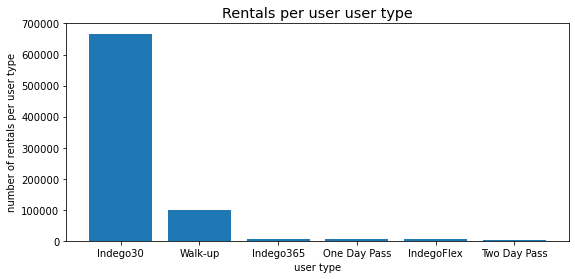

In [24]:
#Compare total amount of rentals by user type in a bar chart diagram
df_n_per_usertype = df_philadelphia_2017.groupby(["user_type"])["user_type"].count().reset_index(name = "n_rides").sort_values(by=['n_rides'], ascending=False)

fig = plt.figure(figsize=(9,4))
plt.bar(df_n_per_usertype["user_type"], df_n_per_usertype["n_rides"])
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)
plt.xlabel("user type", size = 'medium')
plt.ylabel("number of rentals per user type", size = 'medium')
plt.title("Rentals per user user type", size = 'x-large')
plt.show()

You can see that Indego30 makes up the majority of the rentals with Walk-Up, Indego365, One Day Pass, IndegoFlex and Two Day Pass making up around 15 % of the total number of rentals.

Info from https://www.rideindego.com/portal/access-pass/:
<br>Indego30 Access Pass Information
Individuals who hold a Pennsylvania ACCESS card are eligible to sign up for the Indego30 Access Pass, which offers a discount on the cost of a monthly Indego pass.

$5/month gets you 30 days of unlimited 1-hour trips.
Extend your ride time. Rides over one hour will cost an additional fee of 7¢ per minute.
Ride an electric bike. Upgrading your ride to Indego Electric will cost an extra 7¢ per minute. Electric bike fees begin as soon as you have undocked an electric bike.
You can renew your pass every month or choose to cancel anytime.

In [43]:
# Calculate Average trip duration by user type
df_mean_tripduration_usertype = df_philadelphia_2017.groupby(["user_type"])["trip_duration"].mean().reset_index(name = "mean trip duration").sort_values(by=['mean trip duration'], ascending=False)
df_mean_tripduration_usertype

,user_type,mean trip duration
5,Walk-up,0 days 00:46:44.338521013
3,One Day Pass,0 days 00:34:03.149905123
2,IndegoFlex,0 days 00:28:51.185541369
4,Two Day Pass,0 days 00:26:20.361821584
0,Indego30,0 days 00:16:23.176476760
1,Indego365,0 days 00:12:47.929824561


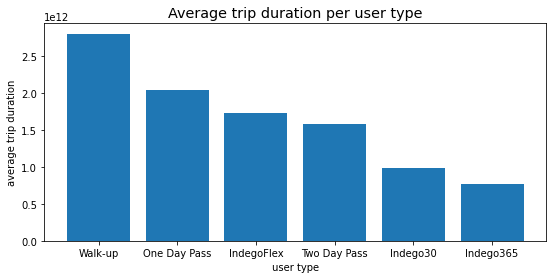

In [55]:
#Plot average trip duration by user type
fig = plt.figure(figsize=(9,4))
plt.bar(df_mean_tripduration_usertype["user_type"], df_mean_tripduration_usertype["mean trip duration"])
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)
plt.xlabel("user type", size = 'medium')
plt.ylabel("average trip duration", size = 'medium')
plt.title("Average trip duration per user type", size = 'x-large')
plt.show()

Prices per User Type:
<br>Using the Wayback Machine for 2017, we can find out the prices for the each user type:
<br>
<br>Indego30: \\$15 per month with unlimited one hour trips (\\$4/hour after one hour)
<br>Indego365: \\$12 per month with unlimited one hour trips (\\$4/hour after one hour)
<br>
<br>One Day Pass: \\$10 per day with unlimited 30 minute trips (\$2 per 30 minutes after first 30 minutes)
<br>Two Day Pass: ???
<br>
<br>IndegoFlex: \\$10 per year with \\$4 per hour
<br>Walk-up: \\$4 per 30 mins

Further potential analytics: 
<br>Popular Stations by User Type
<br>Usertype by Time -> Popular times of the Day, Days, Weeks, Months
<br> Usertype by weather?
<br> Total Revenue by user type?